In [5]:
import pandas  as pd
import math
import numpy as np
import json
import statistics
import matplotlib as matplotlib
from matplotlib import pyplot as plt

In [6]:
with open('models_acc_ClusterCentroids.txt') as f:
    cluster_centroids = json.load(f)

with open('models_acc_RandomUnderSampler.txt') as f:
    random_undersampler = json.load(f)
    
with open('models_acc_SMOTE.txt') as f:
    smote = json.load(f)

In [7]:
df_randu=pd.DataFrame.from_dict(random_undersampler,orient='index').transpose()

In [8]:
df_randu.head()

,KNeighborsClassifier,DecisionTreeClassifier,MLPClassifier,RandomForestClassifier,LinearSVC
0,0.934010,0.913706,0.949239,0.918782,0.939086
1,0.939086,0.923858,0.964467,0.939086,0.959391
2,0.934010,0.903553,0.949239,0.928934,0.964467
3,0.934010,0.908629,0.949239,0.939086,0.944162
4,0.913265,0.903061,0.923469,0.897959,0.928571


In [9]:
from collections import defaultdict
rankins = defaultdict(list)

def soma_x(valor, diff):
    if diff != 0:
        return valor + soma_x(valor-1, diff-1)
    return 0


for i, row in df_randu.iterrows():
    tuple_ = [('KNeighbors', row['KNeighborsClassifier']), ('Decision Tree', row['DecisionTreeClassifier']), ('MLP', row['MLPClassifier']), ('Random Forest', row['RandomForestClassifier']), ('SVM', row['LinearSVC'])]
    sort = sorted(tuple_, key=lambda tup: tup[1], reverse=True)  
    the_last = -1
    for index, valor in enumerate(sort):
        if(index!= 4 and (sort[index+1][1] == sort[index][1])):
            if(the_last == -1):
                the_last = index
        elif (the_last != -1):
            diff = index - the_last + 1
            soma = soma_x(index+1, diff)

            rank = soma/diff        
            for j in range(diff): 
                rankins[sort[the_last][0]].append(rank)
                the_last = the_last + 1
            the_last = -1
        else:
            rankins[sort[index][0]].append(index+1)
    
print(rankins) 

defaultdict(<class 'list'>, {'MLP': [1, 1, 2, 1, 2, 2.5, 4.5, 1.5, 1, 4, 2, 1.5, 2, 1, 2.0, 1, 1.5, 2, 1, 2, 2.5, 1.5, 2, 1, 1, 2, 3, 1, 3, 3, 1.5, 3.0, 2.5, 1, 1, 2, 2.0, 2, 1.5, 1, 3.5, 1, 2.5, 2, 2.5, 1, 3, 3.0, 2, 1.5], 'SVM': [2, 2, 1, 2, 1, 1, 2.5, 1.5, 2, 1.5, 1, 1.5, 3, 2, 4, 2, 1.5, 1, 3.0, 1, 1, 1.5, 3, 2, 2, 1, 1.5, 2, 1.5, 2, 4, 1, 1, 2, 2, 3.5, 2.0, 3, 1.5, 2, 2, 2.5, 1, 1, 2.5, 2.5, 1, 3.0, 1, 1.5], 'KNeighbors': [3, 3.5, 3, 4, 3, 4, 2.5, 4, 3, 1.5, 3, 3.5, 1, 5, 2.0, 3, 3, 3.5, 3.0, 3, 2.5, 3, 1, 3, 3, 3, 4, 3.5, 1.5, 1, 1.5, 3.0, 2.5, 4.5, 3.5, 1, 2.0, 4, 3.5, 3.5, 1, 2.5, 5, 3, 1, 4, 2, 1, 3, 3.5], 'Random Forest': [4, 3.5, 4, 3, 5, 2.5, 1, 3, 4, 3, 5, 3.5, 4, 4, 2.0, 4, 4, 3.5, 3.0, 5, 4, 4, 4, 4, 4, 4, 1.5, 3.5, 4.5, 4, 3, 3.0, 4, 3, 5, 3.5, 4, 1, 5, 3.5, 3.5, 5, 4, 4, 4, 2.5, 5, 3.0, 4, 5], 'Decision Tree': [5, 5, 5, 5, 4, 5, 4.5, 5, 5, 5, 4, 5, 5, 3, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4.5, 5, 5, 5, 5, 4.5, 3.5, 5, 5, 5, 3.5, 5, 5, 4, 2.5, 5, 5, 5, 4, 5, 5, 3

In [10]:
names_list = []
avrangs_list = []
for key, value in rankins.items():
    names_list.append(key)
    avrangs_list.append(statistics.mean(value))
    print(key ,statistics.mean(value))
       

MLP 1.92
SVM 1.88
KNeighbors 2.84
Random Forest 3.67
Decision Tree 4.69


In [11]:
matplotlib.rcParams.update({'font.size': 20})
def graph_ranks(avranks, names, cd=None, cdmethod=None, lowv=None, highv=None,
                width=6, textspace=1, reverse=False, filename=None, **kwargs):
    """
    Draws a CD graph, which is used to display  the differences in methods'
    performance. See Janez Demsar, Statistical Comparisons of Classifiers over
    Multiple Data Sets, 7(Jan):1--30, 2006.

    Needs matplotlib to work.

    The image is ploted on `plt` imported using
    `import matplotlib.pyplot as plt`.

    Args:
        avranks (list of float): average ranks of methods.
        names (list of str): names of methods.
        cd (float): Critical difference used for statistically significance of
            difference between methods.
        cdmethod (int, optional): the method that is compared with other methods
            If omitted, show pairwise comparison of methods
        lowv (int, optional): the lowest shown rank
        highv (int, optional): the highest shown rank
        width (int, optional): default width in inches (default: 6)
        textspace (int, optional): space on figure sides (in inches) for the
            method names (default: 1)
        reverse (bool, optional):  if set to `True`, the lowest rank is on the
            right (default: `False`)
        filename (str, optional): output file name (with extension). If not
            given, the function does not write a file.
    """
    try:
        import matplotlib.pyplot as plt
        from matplotlib.backends.backend_agg import FigureCanvasAgg
    except ImportError:
        raise ImportError("Function graph_ranks requires matplotlib.")

    width = float(width)
    textspace = float(textspace)

    def nth(l, n):
        """
        Returns only nth elemnt in a list.
        """
        n = lloc(l, n)
        return [a[n] for a in l]

    def lloc(l, n):
        """
        List location in list of list structure.
        Enable the use of negative locations:
        -1 is the last element, -2 second last...
        """
        if n < 0:
            return len(l[0]) + n
        else:
            return n

    def mxrange(lr):
        """
        Multiple xranges. Can be used to traverse matrices.
        This function is very slow due to unknown number of
        parameters.

        >>> mxrange([3,5])
        [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

        >>> mxrange([[3,5,1],[9,0,-3]])
        [(3, 9), (3, 6), (3, 3), (4, 9), (4, 6), (4, 3)]

        """
        if not len(lr):
            yield ()
        else:
            # it can work with single numbers
            index = lr[0]
            if isinstance(index, int):
                index = [index]
            for a in range(*index):
                for b in mxrange(lr[1:]):
                    yield tuple([a] + list(b))

    def print_figure(fig, *args, **kwargs):
        canvas = FigureCanvasAgg(fig)
        canvas.print_figure(*args, **kwargs)

    sums = avranks

    tempsort = sorted([(a, i) for i, a in enumerate(sums)], reverse=reverse)
    ssums = nth(tempsort, 0)
    sortidx = nth(tempsort, 1)
    nnames = [names[x] for x in sortidx]

    if lowv is None:
        lowv = min(1, int(math.floor(min(ssums))))
    if highv is None:
        highv = max(len(avranks), int(math.ceil(max(ssums))))

    cline = 0.4

    k = len(sums)

    lines = None

    linesblank = 0
    scalewidth = width - 2 * textspace

    def rankpos(rank):
        if not reverse:
            a = rank - lowv
        else:
            a = highv - rank
        return textspace + scalewidth / (highv - lowv) * a

    distanceh = 0.25

    if cd and cdmethod is None:
        # get pairs of non significant methods

        def get_lines(sums, hsd):
            # get all pairs
            lsums = len(sums)
            allpairs = [(i, j) for i, j in mxrange([[lsums], [lsums]]) if j > i]
            # remove not significant
            notSig = [(i, j) for i, j in allpairs
                      if abs(sums[i] - sums[j]) <= hsd]
            # keep only longest

            def no_longer(ij_tuple, notSig):
                i, j = ij_tuple
                for i1, j1 in notSig:
                    if (i1 <= i and j1 > j) or (i1 < i and j1 >= j):
                        return False
                return True

            longest = [(i, j) for i, j in notSig if no_longer((i, j), notSig)]

            return longest

        lines = get_lines(ssums, cd)
        linesblank = 0.2 + 0.2 + (len(lines) - 1) * 0.1

        # add scale
        distanceh = 0.25
        cline += distanceh

    # calculate height needed height of an image
    minnotsignificant = max(2 * 0.2, linesblank)
    height = cline + ((k + 1) / 2) * 0.2 + minnotsignificant

    fig = plt.figure(figsize=(width*2, height*2))
    fig.set_facecolor('white')
    ax = fig.add_axes([0, 0, 1, 1])  # reverse y axis
    ax.set_axis_off()

    hf = 1. / height  # height factor
    wf = 1. / width

    def hfl(l):
        return [a * hf for a in l]

    def wfl(l):
        return [a * wf for a in l]


    # Upper left corner is (0,0).
    ax.plot([0, 1], [0, 1], c="w")
    ax.set_xlim(0, 1)
    ax.set_ylim(1, 0)

    def line(l, color='k', **kwargs):
        """
        Input is a list of pairs of points.
        """
        ax.plot(wfl(nth(l, 0)), hfl(nth(l, 1)), color=color, **kwargs)

    def text(x, y, s, *args, **kwargs):
        ax.text(wf * x, hf * y, s, *args, **kwargs)

    line([(textspace, cline), (width - textspace, cline)], linewidth=0.7)

    bigtick = 0.1
    smalltick = 0.05

    tick = None
    for a in list(np.arange(lowv, highv, 0.5)) + [highv]:
        tick = smalltick
        if a == int(a):
            tick = bigtick
        line([(rankpos(a), cline - tick / 2),
              (rankpos(a), cline)],
             linewidth=0.7)

    for a in range(lowv, highv + 1):
        text(rankpos(a), cline - tick / 2 - 0.05, str(a),
             ha="center", va="bottom")

    k = len(ssums)

    for i in range(math.ceil(k / 2)):
        chei = cline + minnotsignificant + i * 0.2
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textspace - 0.1, chei)],
             linewidth=0.7)
        text(textspace - 0.13, chei, nnames[i], ha="right", va="center")

    for i in range(math.ceil(k / 2), k):
        chei = cline + minnotsignificant + (k - i - 1) * 0.2
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textspace + scalewidth + 0.1, chei)],
             linewidth=0.7)
        text(textspace + scalewidth + 0.13, chei, nnames[i],
             ha="left", va="center")

    if cd and cdmethod is None:
        # upper scale
        if not reverse:
            begin, end = rankpos(lowv), rankpos(lowv + cd)
        else:
            begin, end = rankpos(highv), rankpos(highv - cd)

        line([(begin, distanceh), (end, distanceh)], linewidth=0.7)
        line([(begin, distanceh + bigtick / 2),
              (begin, distanceh - bigtick / 2)],
             linewidth=0.7)
        line([(end, distanceh + bigtick / 2),
              (end, distanceh - bigtick / 2)],
             linewidth=0.7)
        text((begin + end) / 2, distanceh - 0.05, "DC = " +"{0:.4f}".format(cd),
             ha="center", va="bottom")

        # no-significance lines
        def draw_lines(lines, side=0.05, height=0.1):
            start = cline + 0.2
            for l, r in lines:
                line([(rankpos(ssums[l]) - side, start),
                      (rankpos(ssums[r]) + side, start)],
                     linewidth=2.5)
                start += height

        draw_lines(lines)

    elif cd:
        begin = rankpos(avranks[cdmethod] - cd)
        end = rankpos(avranks[cdmethod] + cd)
        line([(begin, cline), (end, cline)],
             linewidth=2.5)
        line([(begin, cline + bigtick / 2),
              (begin, cline - bigtick / 2)],
             linewidth=2.5)
        line([(end, cline + bigtick / 2),
              (end, cline - bigtick / 2)],
             linewidth=2.5)

    if filename:
        print_figure(fig, filename, **kwargs)

def compute_CD(avranks, n, alpha="0.05", test="nemenyi"):
    """
    Returns critical difference for Nemenyi or Bonferroni-Dunn test
    according to given alpha (either alpha="0.05" or alpha="0.1") for average
    ranks and number of tested datasets N. Test can be either "nemenyi" for
    for Nemenyi two tailed test or "bonferroni-dunn" for Bonferroni-Dunn test.
    """
    k = len(avranks)
    d = {("nemenyi", "0.05"): [0, 0, 1.959964, 2.343701, 2.569032, 2.727774,
                               2.849705, 2.94832, 3.030879, 3.101730, 3.163684,
                               3.218654, 3.268004, 3.312739, 3.353618, 3.39123,
                               3.426041, 3.458425, 3.488685, 3.517073,
                               3.543799,3.569040],
         ("nemenyi", "0.1"): [0, 0, 1.644854, 2.052293, 2.291341, 2.459516,
                              2.588521, 2.692732, 2.779884, 2.854606, 2.919889,
                              2.977768, 3.029694, 3.076733, 3.119693, 3.159199,
                              3.195743, 3.229723, 3.261461, 3.291224, 3.319233],
         ("bonferroni-dunn", "0.05"): [0, 0, 1.960, 2.241, 2.394, 2.498, 2.576,
                                       2.638, 2.690, 2.724, 2.773],
         ("bonferroni-dunn", "0.1"): [0, 0, 1.645, 1.960, 2.128, 2.241, 2.326,
                                      2.394, 2.450, 2.498, 2.539]}
    q = d[(test, alpha)]
    print(k, q)
    cd = q[k] * (k * (k + 1) / (6.0 * n)) ** 0.5
    return cd

In [12]:
def generate_cdd(names, avranks, widthx):
    cd = compute_CD(avranks, 10, test="nemenyi") #tested on 30 datasets
    graph_ranks(avranks, names, cd=cd, width=widthx, textspace=1.5,reverse=True,filename="saida.png")
    plt.show()

5 [0, 0, 1.959964, 2.343701, 2.569032, 2.727774, 2.849705, 2.94832, 3.030879, 3.10173, 3.163684, 3.218654, 3.268004, 3.312739, 3.353618, 3.39123, 3.426041, 3.458425, 3.488685, 3.517073, 3.543799, 3.56904]


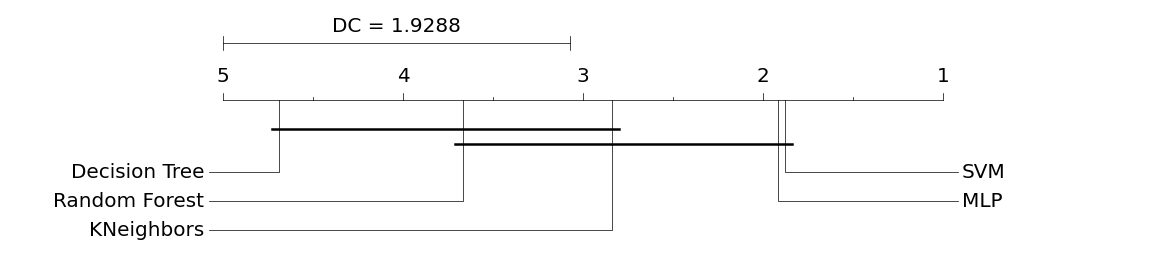

In [13]:
generate_cdd(names_list,avrangs_list,8)

In [18]:
from scipy import stats
print(stats.friedmanchisquare(df_randu['KNeighborsClassifier'], df_randu['DecisionTreeClassifier'], df_randu['MLPClassifier'], df_randu['RandomForestClassifier'], df_randu['LinearSVC']))

FriedmanchisquareResult(statistic=121.2096944151739, pvalue=2.9462131658431136e-25)


In [15]:
df_randu['KNeighborsClassifier']

0     0.934010
1     0.939086
2     0.934010
3     0.934010
4     0.913265
5     0.908629
6     0.949239
7     0.913706
8     0.949239
9     0.943878
10    0.939086
11    0.913706
12    0.969543
13    0.908629
14    0.948980
15    0.939086
16    0.939086
17    0.928934
18    0.944162
19    0.933673
20    0.959391
21    0.944162
22    0.974619
23    0.893401
24    0.928571
25    0.934010
26    0.939086
27    0.913706
28    0.939086
29    0.938776
30    0.939086
31    0.928934
32    0.944162
33    0.888325
34    0.938776
35    0.939086
36    0.949239
37    0.918782
38    0.944162
39    0.933673
40    0.969543
41    0.934010
42    0.928934
43    0.928934
44    0.938776
45    0.923858
46    0.954315
47    0.939086
48    0.923858
49    0.954082
Name: KNeighborsClassifier, dtype: float64